<a href="https://colab.research.google.com/github/alfonsoayalapaloma/ml-2024/blob/main/ml_07_pca_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> Principal Components Analysis (PCA)

# Solución de un problema de PCA en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar las features]
2.   Definir los hiperparametros del modelo
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clustering de data de pinguinos

1. Análisis del problema


Usted es un ingeniero de Machine Learning trabajando para Concha y Toro. Le piden que desarrolle un modelo que permita clasificar sus vinos dependiento del segmento del cliente al que más le gusta (customer_segment). Sin embargo, el modelo debe tener solo dos features.


Se puede utilizar un metodoc como PCA para reducir la dimension del problema.



```
# url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/refs/heads/main/Wine.csv"
```



2. Extraccion del dataset. Limpieza

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/alfonsoayalapaloma/datasets/refs/heads/main/Wine.csv"
# Load the dataset
wine=pd.read_csv(url)
# Drop rows with missing values
wine = wine.dropna()

wine.sample(3)




,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,3
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,3
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,3


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
# Select numerical features
df=wine.copy()


In [4]:
df.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


3. EDA. Análisis del dataset

In [5]:
df.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Normalizar las features

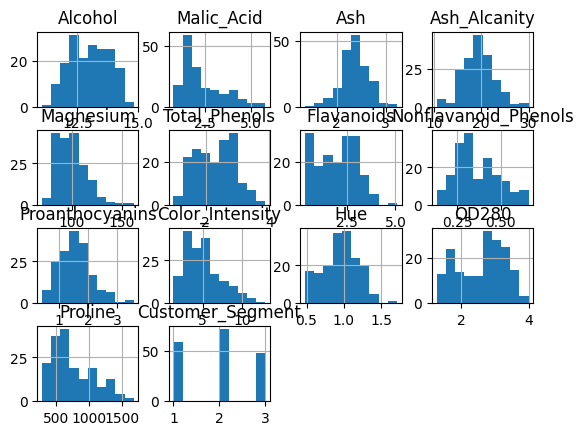

In [6]:
df.hist();

In [7]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


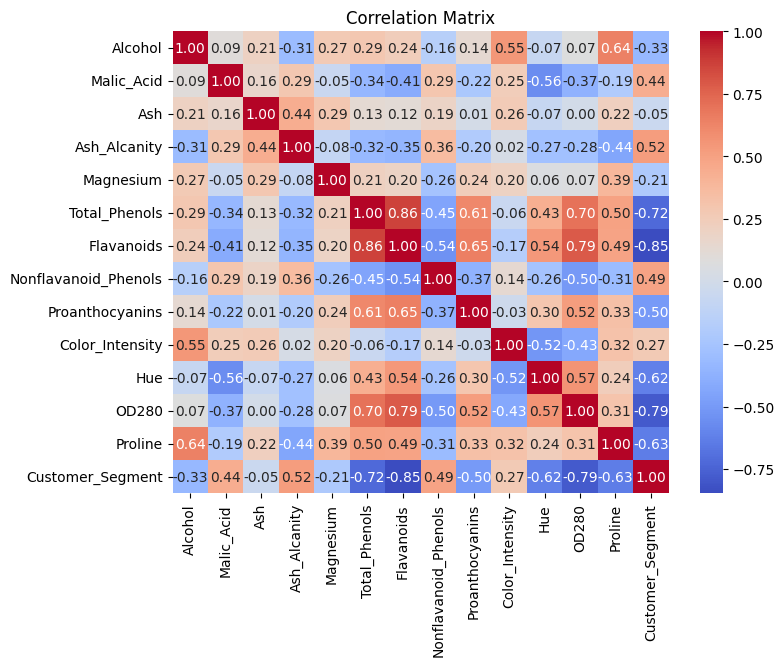

In [8]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Display correlation values on the heatmap
    fmt=".2f",           # Format the correlation values
    cmap="coolwarm",     # Color map
    cbar=True            # Show the color bar
)
plt.title("Correlation Matrix")
plt.show()

4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [24]:
features=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
target_col="Customer_Segment"

X=df[features]
y=df[target_col]

target_ids = df[target_col].unique()
target_names = list(map(str, target_ids))
print(target_names)

['1', '2', '3']


In [14]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X[3]

array([ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
        2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
       -0.42754369,  1.18407144,  2.33457383])

5. Definir hiperparametros del modelo.

En este caso se debe buscar el parametro "numero de features". Este debe ser 2.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [16]:
X[3]

array([3.75706561, 2.75637191])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

6. Crear y Entrenar (Ajustar) el modelo.

In [18]:
# Apply K-Means clustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

7. Hacer predicciones

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)


[1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]
54     1
151    3
63     2
55     1
123    2
121    2
7      1
160    3
106    2
90     2
141    3
146    3
5      1
98     2
168    3
80     2
33     1
18     1
61     2
51     1
66     2
37     1
4      1
104    2
60     2
111    2
126    2
86     2
112    2
164    3
26     1
56     1
129    2
45     1
8      1
44     1
Name: Customer_Segment, dtype: int64


8. Calificar el modelo

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



9. Visualizar el resultado

<ipython-input-26-b74d4f40061c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


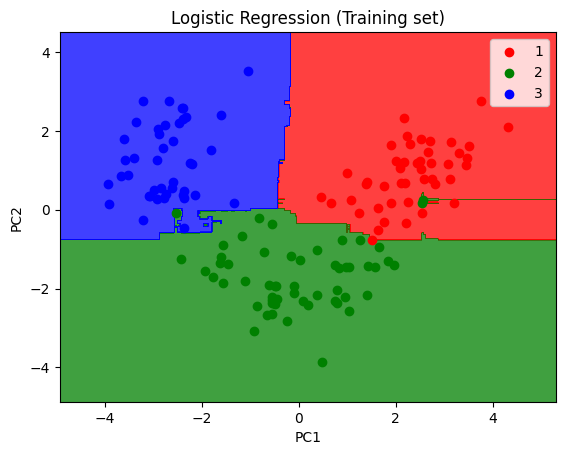

In [26]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

10. Elaborar conclusiones

El modelo clasifica los vinos por segmentos de clientes usando dos componentes con un accuracy alto, por lo tanto es un muy buen modelo.

## Ejercicio

Use PCA para resolver un problema de clasificacion de las flores IRIS.


1. Análisis

2. Extracción del dataset. Limpieza.

3. EDA Análisis del dataset

4. Feature engineering.  [ determinar variables independientes(X) y dependiente(y)]

5. definir los hiperparametros del modelo

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Realice el mismo ejercicio con otro problema de clasificación.

